In [2]:
# 線形モデルによる重回帰分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# 読込
df = pd.read_csv("../sort_demo_shipment_result.csv", encoding="cp932")
df = df.iloc[:, [20, 40, 44, 47, 52]]
print(df)

#マスタデータ読み込み
df_master = pd.read_csv("../dummy_product_master.csv", encoding="cp932", header=None)
df_master = df_master.iloc[:, [1, 44, 68]]
print(df_master)

         20        40                                        44          47  \
0      北陸信越  20221008  a3M1oMGrFWAS0ppjbZjjg2qwjgdNr33ab60whViI   Product29   
1       南関東  20221008  LOjdMxMzGQXyGn1CuxIPtwcsf9WgVNvi98YaaaYN   Product23   
2        東京  20221008  uNdcG8SXzB3IJEdqhHp8HQbCkfQwhMR9dRjQPHtu   Product28   
3       北海道  20221008  H1rqSTX6eqGZQv4LzjEbx2A8J6231TPthReT9K8i   Product12   
4        東北  20221008  91ngS7moyuvsrXc4cLSSCToqj4oPXEfQGzJ75mrn   Product11   
5        四国  20221008  91ngS7moyuvsrXc4cLSSCToqj4oPXEfQGzJ75mrn   Product11   
6       北関東  20221008  A1g45WbIoBhdnVFH6FjCg9agd2xsqZvJBH3ngxr2   Product25   
7      北陸信越  20221008  x1uZQoJMF8BaCw5zdiFlL8ceo9omgG1kbeF0AxUQ    Product9   
8        東京  20221008  LOjdMxMzGQXyGn1CuxIPtwcsf9WgVNvi98YaaaYN   Product23   
9        近畿  20221008  LOjdMxMzGQXyGn1CuxIPtwcsf9WgVNvi98YaaaYN   Product23   
10       近畿  20221008  LOjdMxMzGQXyGn1CuxIPtwcsf9WgVNvi98YaaaYN   Product23   
11      北海道  20221008  LOjdMxMzGQXyGn1CuxIPtwcsf9WgV

In [3]:
# １日おきの各商品の出荷数をまとめる


# ユニークな商品の数をカウント
pcode = df["44"].unique() #実際は商品名に重複がある可能性があるので、商品コードで判別
pname = df["47"].unique()
print(type(pcode))
print(pname[0:5]) 
print(len(pname))

# 今日の日にち（string)
now = "20221009"

# 日付初期値
initdate = datetime.date(2018, 1, 1)
# 当日
nowdate = datetime.date(int(now[0:4]), int(now[4:6]), int(now[6:8]))
print(nowdate)
# 差日
difdate = nowdate - initdate

# 初回販売日と最終販売日を格納する配列
masterdate_data = np.zeros((len(pcode), 2))

for i in range(len(pcode)):
    idf = df[df["44"] == pcode[i]]
    idf = idf.loc[:, ["40", "52"]]
    
#     最初の出荷日
    min_date = str(idf["40"].min())
    min_date = datetime.date(int(min_date[0:4]), int(min_date[4:6]), int(min_date[6:8]))
    
#     最後の出荷日
    max_date = str(idf["40"].max())
    max_date = datetime.date(int(max_date[0:4]), int(max_date[4:6]), int(max_date[6:8]))
    
    masterdate_data[i] = np.array([min_date.strftime("%Y%m%d"), max_date.strftime("%Y%m%d")])

print(masterdate_data[0:6])

<class 'numpy.ndarray'>
[' Product29' ' Product23' ' Product28' ' Product12' ' Product11']
30
2022-10-09
[[20211128. 20221008.]
 [20220620. 20221008.]
 [20220126. 20221008.]
 [20190412. 20221008.]
 [20220115. 20221008.]
 [20220401. 20221008.]]


In [4]:
# 20221008時点で販売・出荷を継続している商品だけを抽出
oindex = np.where(masterdate_data.T[1] == 20221008) #データと商品コードを紐づけるインデックス
oindex = oindex[0]
print(oindex)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


In [5]:
# 出荷データ格納配列
data = np.zeros((len(oindex), difdate.days))

for i in range(len(oindex)):
    
#     販売初日
    min_date = datetime.date(int(str(masterdate_data[oindex[i]][0])[0:4]), int(str(masterdate_data[oindex[i]][0])[4:6]), int(str(masterdate_data[oindex[i]][0])[6:8]))
     
    #    販売総日にち
    sumday = nowdate - min_date   
    sumday = sumday.days
    
#     日付初期値と最初の出荷日の差日
    dday = min_date - initdate
    dday = dday.days
    
#     抽出
    idf = df[df["44"] == pcode[oindex[i]]]
    idf = idf.loc[:, ["40", "52"]]
    
    for j in range(sumday):
        
        idate = min_date + datetime.timedelta(days=j)
        idate = idate.strftime("%Y%m%d")
        
        idf_samedate = idf[idf["40"] == int(idate)]
        
        data[i][j+dday] = idf_samedate["52"].sum()   
    
print(data[0:5])

[[  0.   0.   0. ... 289. 263. 301.]
 [  0.   0.   0. ...  92.  91.  89.]
 [  0.   0.   0. ...  14.  20.  11.]
 [  0.   0.   0. ... 151. 152. 160.]
 [  0.   0.   0. ...  63.  52.  41.]]


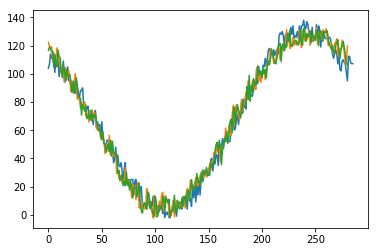

[0.9719024  0.97300509 0.97488673 0.97368042 0.97199526]


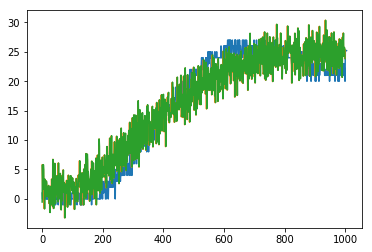

[0.87711932 0.87883255 0.87462188 0.87856455 0.87918229]


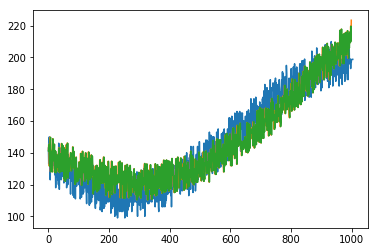

[0.84534329 0.84632423 0.84562028 0.85025763 0.84675818]


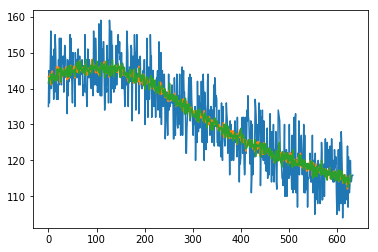

[0.75619161 0.76171722 0.75728611 0.75729723 0.76467081]


In [87]:

# product0,1,2,3,の商品情報が格納されているindexを取得
pindex = np.zeros(4)
pindex[0] = np.where(pname == " Product0")[0]
pindex[1] = np.where(pname == " Product1")[0]
pindex[2] = np.where(pname == " Product2")[0]
pindex[3] = np.where(pname == " Product3")[0]
pindex = pindex.astype(int)

# 各商品に対して重回帰分析
for i in range(4):
    
    # 予測対象商品の初出荷日～今日まで出荷・販売をしている商品を抜き出す
    minitdate = str(masterdate_data[int(pindex[i])][0])
    minitdate = datetime.date(int(minitdate[0:4]), int(minitdate[4:6]), int(minitdate[6:8]))#初出荷日
   
    #総販売日にち
    dday = nowdate - minitdate
    dday = dday.days
    
    #予測する本体のデータ
    self_data = data[pindex[i]]
    
    
    
    target_product_idx = np.zeros(0) #独立変数対象商品のインデックス配列の取得
    for j in range(len(oindex)):
        if(oindex[j] != pindex[i]):
            target_date = str(masterdate_data[oindex[j]][0])
            target_date = datetime.date(int(target_date[0:4]), int(target_date[4:6]), int(target_date[6:8]))
            
            if target_date < minitdate - datetime.timedelta(days=5):
                target_product_idx = np.append(target_product_idx, oindex[j])
        
    target_product_idx = target_product_idx.astype(int)
    target_data = data[target_product_idx] #独立変数データ
    
    
    A, castdata = Mulrgs_analysis_for_product(self_data, target_data, dday, 5)
    print(A)
# =================================================================================================================
# #     独立変数の数よりも時系列データ要素数-5の方が多い場合
#     if len(target_product_idx) <= (dday-5):
        
#         num = np.count_nonzero(self_data) #重回帰分析データ数
#         covdata = np.zeros((len(target_product_idx), num)) # 回帰式に使用する出荷数データ
#         nowcovdata = np.zeros(len(target_product_idx)) #現在の独立変数の値が格納される配列
        
#         for k in range(len(target_product_idx)):
# #                 covdata[k] = data[target_product_idx[k]][-len(target_product_idx)-1:-1] #１日ラグを発生させる
# #                 nowcovdata[k] = data[target_product_idx[k]][-1] 
#                 covdata[k] = target_data[k][-num-1:-1]
#                 nowcovdata[k] = target_data[k][-1]
        
        
#         iself_data = self_data[-num:] #次元を合わせる
       
#         self_cov = np.cov(iself_data, covdata, bias=True) #予測商品との分散・共分散行列
#         cov = np.cov(covdata, bias=True)
        
# #         係数計算
#         b = np.dot(np.linalg.inv(cov), self_cov[0][1:])
        
#         cast_selfdata = np.zeros(len(target_product_idx))
       
# #     定数項の計算
#         bo = np.mean(iself_data) 
#         for k in range(len(target_product_idx)):
#             bo -= np.mean(covdata[k])*b[k]
#         print(bo)
#         print(np.sum(b*nowcovdata) + bo)
           
# #         推定データの確認
#         cast_selfdata = np.dot(covdata.T, b) + bo
#         cast_selfdata = np.append(cast_selfdata, (np.dot(nowcovdata.T, b) + bo))
#         plt.plot(iself_data[-100:])
#         plt.plot(cast_selfdata[-100:])
#         plt.show()
        
# #       
        
        

# =========================================================================================================================================



In [86]:
# 重回帰分析関数
def Mulrgs_analysis_for_product(selfdata, target_data, dday, pren):
# 予測したいデータの過去データ: selfdata 独立変数データ: targetdata, 予測商品の総販売日数: dday 予測数: pren
    
    num = np.count_nonzero(self_data) #重回帰分析データ数
    cast = np.zeros(pren) #予測データ格納配列
    A = np.zeros(pren) #自由度調整済み決定係数行列
    
    #     独立変数の数よりも時系列データ要素数-prenの方が多い場合
    if len(target_data) <= (num-pren):
        
        cast_selfdata = np.zeros((pren, num)) #各モデルから生成したデータを格納(実際値との比較で使用)
        
        for i in range(pren):

            covdata = np.zeros((len(target_data), num)) # 回帰式に使用する出荷数データ
            nowcovdata = np.zeros(len(target_data)) #現在の独立変数の値が格納される配列
            
            for k in range(len(target_data)):
                    covdata[k] = target_data[k][-num-i-1:-i-1] #ラグを発生させる
                    nowcovdata[k] = target_data[k][-1]


            iself_data = self_data[-num:] #self_dataの次元を合わせる

            self_cov = np.cov(iself_data, covdata, bias=True) #予測商品との分散・共分散行列
            cov = np.cov(covdata, bias=True)

    #         係数計算
            b = np.dot(np.linalg.inv(cov), self_cov[0][1:])

    #     定数項の計算
            bo = np.mean(iself_data) 
            for k in range(len(target_data)):
                bo -= np.mean(covdata[k])*b[k]

    #         推定データの格納
            cast[i] = np.dot(nowcovdata.T, b) + bo
            
#           決定係数の計算（確認程度のもの）   
            cast_selfdata[i] = np.dot(covdata.T, b) + bo
            A[i] = 1 - ((np.sum((iself_data - cast_selfdata[i])**2) / (num - len(target_data) - 1)) / (np.sum((iself_data - np.mean(iself_data))**2) / (num - 1)))
                        
        
    #   時系列データ要素数-5よりも独立変数の数の方が多い場合（データの少なさを補うために独立変数を変更して複数回重回帰分析をしてより良いモデルを選択する)
    else:
        cast_selfdata = np.zeros((pren, num))
        
        for i in range(pren):
            
            covdata = np.zerosnp.zeros((len(target_data), num))
            nowcovdata = np.zeros(len(target_data))
            
            
        
        
#     確認
    plt.plot(np.append(iself_data[-1000:], cast))
    for i in range(2):
        plt.plot(cast_selfdata[i][-1000:])
    
    plt.show()
    
    return A, cast